# 1. 환경 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [3]:
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

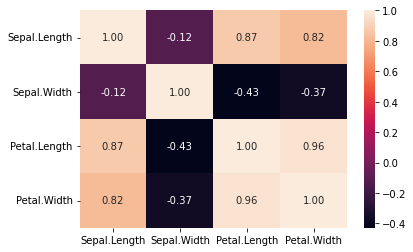

In [8]:
corr = data.corr()

sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# 3. 데이터 준비

#### 1) x,y 분리

In [9]:
target = 'Species'

x = data.drop(target, axis=1)
y = data[target]

#### 2) 학습용, 평가용 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

# 4. 모델링

In [13]:
# 1단계 : 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
# 2단계 : 선언하기
model = DecisionTreeClassifier()

In [15]:
# 3단계 : 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

In [18]:
# 5단계 : 평가하기
accuracy_score(y_test,y_pred)

0.9555555555555556

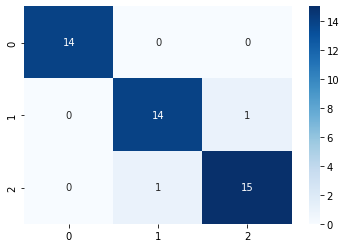

In [19]:
# 혼동행렬 시각화
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True, cmap='Blues')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


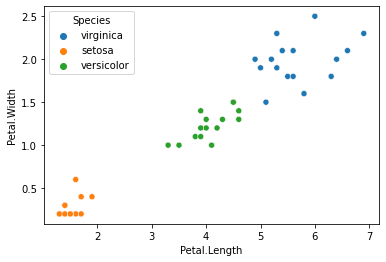

In [22]:
# 산점도로 정답, 예측값 비교
sns.scatterplot(x_test['Petal.Length'],x_test['Petal.Width'], hue=y_test)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


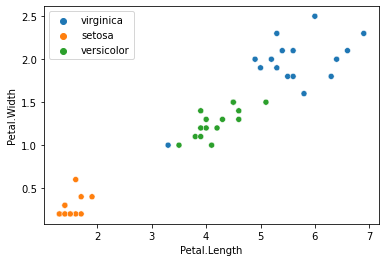

In [21]:
# 예측값
sns.scatterplot(x_test['Petal.Length'],x_test['Petal.Width'], hue=y_pred)
plt.show()